In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [35]:
MUTATION_PROBABILITY = 0.2
INITIAL_POP_SIZE = 100000
GENERATIONS = 100
SURVIVAL_THRESHOLD = 0.25

In [36]:
# survives()
#
# Creatures face competition for survival, which causes selection.
# We may want to redefine survival rates in terms of "prey" as
# discussed in class and use those equations. This would be more
# realistic than the survival function below.
#
# For now, each creature's survival is determined by their fitness
# with some random noise plugged into a logistic function. If this
# perturbed fitness is greater than SURVIVAL_THRESHOLD (a randomly 
# chosen threshold that we should think more about) then it survives.
def survives(creature):
    return 1 / (1 + np.exp(-(creature.fitness - 1))) > SURVIVAL_THRESHOLD

def reproduce(creature):
    children = []
    for _ in range(1):
        children.append(birthChild(creature))
    return children

# birthChild()
# Each creature reproduces asexually. Child has a mutation
# with probability MUTATION_PROBABILITY. The mutation causes
# the fitness level to be a slight variation on the parent fitness.
def birthChild(creature):
    if random.random() < MUTATION_PROBABILITY:
        return Creature(creature.fitness + np.random.normal()/10)

    return creature

def printCreatures(currentCreatures):
    for creature in currentCreatures:
        print(creature.fitness, end=" ")
    print()

class Creature:
    def __init__(self, fitness):
        self.fitness = fitness
        
def calculateAverage(currentCreatures):
    return sum([creature.fitness for creature in currentCreatures]) / len(currentCreatures)

In [41]:
def runSimulation():
    # The first generation of creatures has population size INITIAL_POP_SIZE.
    # Each of these creatures has a fitness level of 1.
    currentCreatures = []
    for _ in range(INITIAL_POP_SIZE):
        currentCreatures.append(Creature(1))
    
    # We will track the average fitness of the population after each generation.
    fitnessHist = []
    fitnessHist.append(calculate_average(currentCreatures))

    # Simulate GENERATIONS generations of creatures, recording the average
    # fitness level at each generation.
    for _ in range(GENERATIONS):
        childCreatures = []
        for creature in currentCreatures:
            if survives(creature):
                children = reproduce(creature)
                childCreatures += children

        currentCreatures = childCreatures
        fitnessHist.append(calculateAverage(currentCreatures))
    
    return fitnessHist

In [42]:
simulations = []

for _ in range(5):
    fitnessHist = runSimulation()
    simulations.append(fitnessHist)

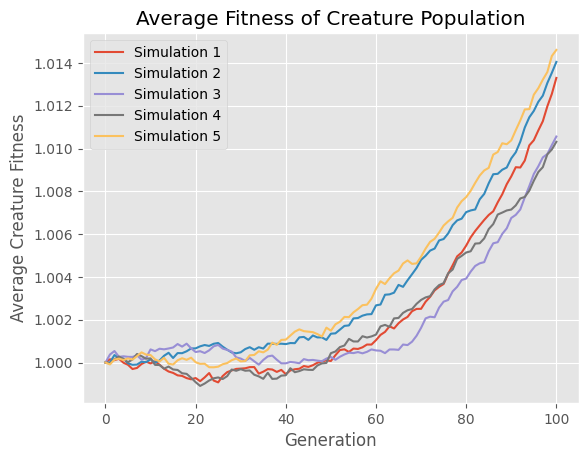

In [51]:
plt.figure()
plt.style.use("ggplot")
plt.xlabel("Generation")
plt.ylabel("Average Creature Fitness")
plt.title("Average Fitness of Creature Population")
for i, fitnessHist in enumerate(simulations):
    plt.plot(fitnessHist, label = "Simulation " + str(i + 1))
plt.legend()
# plt.savefig("AverageFitness0.png")